In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

In [3]:
#creating a data frame from pandas
data = {
    'Date': ['2024-01-01 ', ' 2024-01-02', '2024-01-03'],
    'Price': ['$1,200', '$950', 'N/A'],
    'Category': [' SUV', 'Sedan ', 'Truck'],
    'Purchased': ['Yes', 'No', 'Yes'],
    'Mileage (km)': ['10,000', '8500', '12,200'],
    'Flag': [True, False, True]
}
df = pd.DataFrame(data)
df

,Date,Price,Category,Purchased,Mileage (km),Flag
0,2024-01-01,"$1,200",SUV,Yes,"10,000",True
1,2024-01-02,$950,Sedan,No,8500,False
2,2024-01-03,N/A,Truck,Yes,"12,200",True


In [4]:
# STRING CLEANING
df['Date'] = df['Date'].str.strip()
df['Category'] = df['Category'].str.strip()
df['Price'] = df['Price'].str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Mileage (km)'] = df['Mileage (km)'].str.replace(',', '', regex=False)
df

,Date,Price,Category,Purchased,Mileage (km),Flag
0,2024-01-01,1200,SUV,Yes,10000,True
1,2024-01-02,950,Sedan,No,8500,False
2,2024-01-03,N/A,Truck,Yes,12200,True


In [6]:
# Convert to numeric 

df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Mileage (km)'] = pd.to_numeric(df['Mileage (km)'], errors='coerce')
df


,Date,Price,Category,Purchased,Mileage (km),Flag
0,2024-01-01,1200.0,SUV,Yes,10000,True
1,2024-01-02,950.0,Sedan,No,8500,False
2,2024-01-03,NaN,Truck,Yes,12200,True


In [7]:
# handle missing values nan

df_drop = df.dropna()
df['Price'] = df['Price'].fillna(df['Price'].mean())
df['Mileage (km)'] = df['Mileage (km)'].fillna(0)
df

,Date,Price,Category,Purchased,Mileage (km),Flag
0,2024-01-01,1200.0,SUV,Yes,10000,True
1,2024-01-02,950.0,Sedan,No,8500,False
2,2024-01-03,1075.0,Truck,Yes,12200,True


In [8]:
# drop columns

df = df.drop(columns=['Date'])
df

,Price,Category,Purchased,Mileage (km),Flag
0,1200.0,SUV,Yes,10000,True
1,950.0,Sedan,No,8500,False
2,1075.0,Truck,Yes,12200,True


In [9]:
# encode categorical variables

le = LabelEncoder()
df['Category_LE'] = le.fit_transform(df['Category'])

df_onehot = pd.get_dummies(df, columns=['Category'], drop_first=True)
df_onehot.head()

,Price,Purchased,Mileage (km),Flag,Category_LE,Category_Sedan,Category_Truck
0,1200.0,Yes,10000,True,0,False,False
1,950.0,No,8500,False,1,True,False
2,1075.0,Yes,12200,True,2,False,True


In [10]:
# convert boolean to binary

df['Purchased'] = df['Purchased'].map({'Yes': 1, 'No': 0})
df['Flag'] = df['Flag'].astype(int)
df

,Price,Category,Purchased,Mileage (km),Flag,Category_LE
0,1200.0,SUV,1,10000,1,0
1,950.0,Sedan,0,8500,0,1
2,1075.0,Truck,1,12200,1,2


In [11]:
# feature scaling

scaler_standard = StandardScaler()
scaler_minmax = MinMaxScaler()
cols_to_scale = ['Price', 'Mileage (km)']

df_standard = df.copy()
df_standard[cols_to_scale] = scaler_standard.fit_transform(df_standard[cols_to_scale])

df_minmax = df.copy()
df_minmax[cols_to_scale] = scaler_minmax.fit_transform(df_minmax[cols_to_scale])

print("Standard Scaled:")
display(df_standard.head())

print("Min-Max Scaled:")
display(df_minmax.head())

Standard Scaled:


,Price,Category,Purchased,Mileage (km),Flag,Category_LE
0,1.224745,SUV,1,-0.153559,1,0
1,-1.224745,Sedan,0,-1.140724,0,1
2,0.000000,Truck,1,1.294283,1,2


Min-Max Scaled:


,Price,Category,Purchased,Mileage (km),Flag,Category_LE
0,1.0,SUV,1,0.405405,1,0
1,0.0,Sedan,0,0.000000,0,1
2,0.5,Truck,1,1.000000,1,2


In [12]:
# CHECKING OUR DATA

print("Data Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isna().sum())
df.head()

Data Types:
Price           float64
Category         object
Purchased         int64
Mileage (km)      int64
Flag              int64
Category_LE       int64
dtype: object

Missing Values:
Price           0
Category        0
Purchased       0
Mileage (km)    0
Flag            0
Category_LE     0
dtype: int64


,Price,Category,Purchased,Mileage (km),Flag,Category_LE
0,1200.0,SUV,1,10000,1,0
1,950.0,Sedan,0,8500,0,1
2,1075.0,Truck,1,12200,1,2


In [17]:
# RENAMING COLUMNS
df = df.rename(columns={'Price ($)': 'Price', 'Mileage (km)': 'Mileage'})

In [20]:
## ➕ Creating, Adding, and Deleting Variables & Observations
# This section covers how to create new columns (variables), modify them, and add or remove rows (observations) in a DataFrame.

# --- Creating New Variables (Columns) ---
# Simple column creation using arithmetic
df["Price_per_km"] = df["Price"] / df["Mileage"]

# Create based on conditions
df["High_Price"] = np.where(df["Price"] > 1000, 1, 0)

# Create using existing columns (e.g., log transform)
df["Log_Price"] = np.log(df["Price"] + 1)

# Create from string operations
df["Category_Length"] = df["Category"].str.len()

# --- Adding Columns ---
# Add a constant column
df["Region"] = "Ontario"

# Add a new column using assign (returns new DataFrame)
df = df.assign(Discounted_Price=lambda x: x["Price"] * 0.9)

# --- Deleting Columns ---
# Drop one or multiple columns
df = df.drop(columns=["Region", "High_Price"])

# --- Adding Observations (Rows) ---
# Create a new row as a dictionary
new_row = {"Price": 800, "Mileage (km)": 9000, "Category": "SUV", "Purchased": 1, "Flag": 1, "Price_per_km": 0.088, "Log_Price": np.log(801), "Category_Length": 3}
df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

# --- Deleting Observations (Rows) ---
# Drop by index
df = df.drop(index=0)

# Drop rows based on condition
df = df[df["Price"] > 500]

# --- Renaming Columns (Quick Reference) ---
df = df.rename(columns={"Price": "Price_CAD", "Mileage": "Mileage_km"})

# --- Final Preview ---
df.head()

,Price_CAD,Category,Purchased,Mileage_km,Flag,Category_LE,Price_per_km,Log_Price,Category_Length,Discounted_Price,Mileage (km)
1,950.0,Sedan,0,8500.0,0,1.0,0.111765,6.857514,5,855.0,NaN
2,1075.0,Truck,1,12200.0,1,2.0,0.088115,6.981006,5,967.5,NaN
3,800.0,SUV,1,NaN,1,NaN,0.088000,6.685861,3,NaN,9000.0


In [21]:
# Pandas READ CSV
churn = pd.read_csv("churn.txt")

In [24]:
# HEAD: DISPLAY FIRST X OBSERVATION
churn.head(10)

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False.
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False.
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False.
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False.
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False.


In [25]:
#SHAPE: rows and columns of dataset
churn.shape

(3333, 21)

In [26]:
# DATA TYPES 
churn.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

In [27]:
# NONnull count and data types
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [28]:
#VIEW THE CHURN COLUMN
churn["Churn?"]

0       False.
1       False.
2       False.
3       False.
4       False.
         ...  
3328    False.
3329    False.
3330    False.
3331    False.
3332    False.
Name: Churn?, Length: 3333, dtype: object

In [29]:
# COUNT UNIQUE VALUES IN CHURN COLUMN
churn["Churn?"].value_counts()

Churn?
False.    2850
True.      483
Name: count, dtype: int64

In [30]:
# NORMALIZE COUNT VALUES IN CHRUN % 
churn["Churn?"].value_counts(normalize = True)* 100

Churn?
False.    85.508551
True.     14.491449
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Churning Customers')

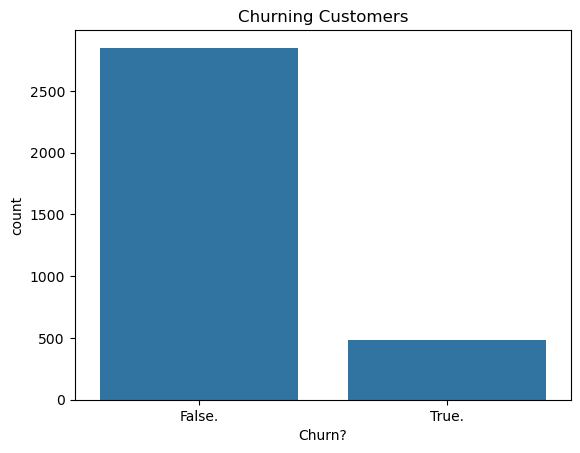

In [31]:
ax = sns.countplot(churn, x="Churn?")
ax.set_title("Churning Customers")

<Axes: title={'center': 'Churning Customers'}, xlabel='Churn?'>

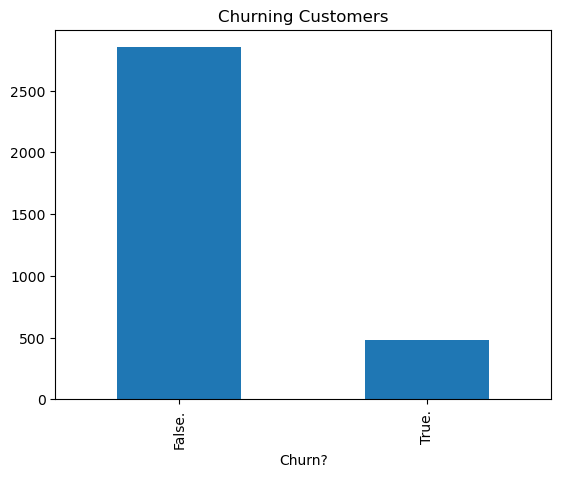

In [32]:
churn["Churn?"].value_counts().plot(kind= 'bar', title="Churning Customers")

In [33]:
churn_crosstab = pd.crosstab(churn["Churn?"], churn["Int'l Plan"], margins=False)
churn_crosstab

Int'l Plan,no,yes
Churn?,,
False.,2664,186
True.,346,137


In [34]:
pd.crosstab(churn["Churn?"], churn["Int'l Plan"], margins=True)

Int'l Plan,no,yes,All
Churn?,,,
False.,2664,186,2850
True.,346,137,483
All,3010,323,3333


<Axes: xlabel="Int'l Plan", ylabel='count'>

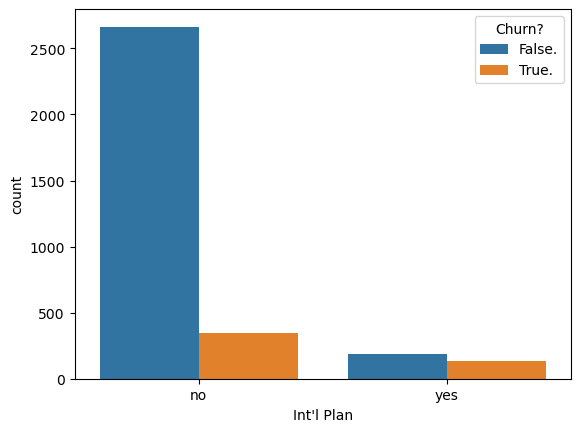

In [35]:
sns.countplot(x="Int'l Plan", hue="Churn?", data=churn)

In [36]:
churn_crosstab = churn_crosstab.transpose()
churn_crosstab

Churn?,False.,True.
Int'l Plan,,
no,2664,346
yes,186,137


<Axes: xlabel="Int'l Plan">

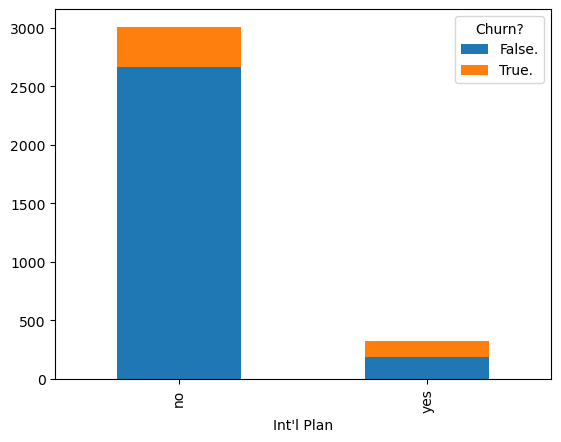

In [37]:
churn_crosstab.plot(kind = 'bar', stacked=True)

In [38]:
churn_crosstab_norm = churn_crosstab.div(churn_crosstab.sum(axis=1), axis=0)
churn_crosstab_norm

Churn?,False.,True.
Int'l Plan,,
no,0.885050,0.114950
yes,0.575851,0.424149


<Axes: xlabel="Int'l Plan">

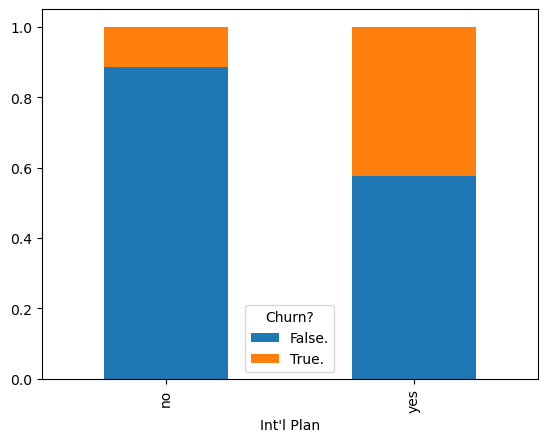

In [39]:
churn_crosstab_norm.plot(kind = 'bar', stacked=True)

In [40]:
churn.describe()

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


array([[<Axes: title={'center': 'Account Length'}>,
        <Axes: title={'center': 'Area Code'}>,
        <Axes: title={'center': 'VMail Message'}>,
        <Axes: title={'center': 'Day Mins'}>],
       [<Axes: title={'center': 'Day Calls'}>,
        <Axes: title={'center': 'Day Charge'}>,
        <Axes: title={'center': 'Eve Mins'}>,
        <Axes: title={'center': 'Eve Calls'}>],
       [<Axes: title={'center': 'Eve Charge'}>,
        <Axes: title={'center': 'Night Mins'}>,
        <Axes: title={'center': 'Night Calls'}>,
        <Axes: title={'center': 'Night Charge'}>],
       [<Axes: title={'center': 'Intl Mins'}>,
        <Axes: title={'center': 'Intl Calls'}>,
        <Axes: title={'center': 'Intl Charge'}>,
        <Axes: title={'center': 'CustServ Calls'}>]], dtype=object)

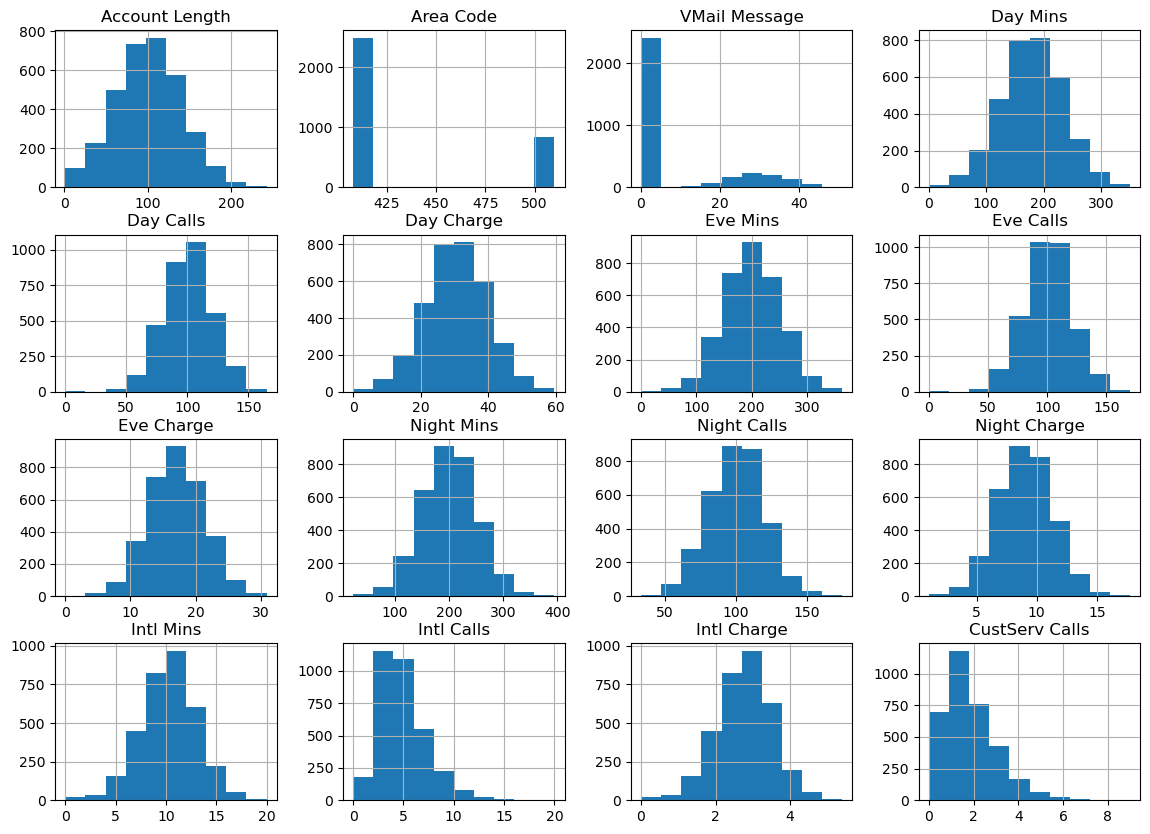

In [41]:
churn.hist(figsize=(14,10))

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>]], dtype=object)

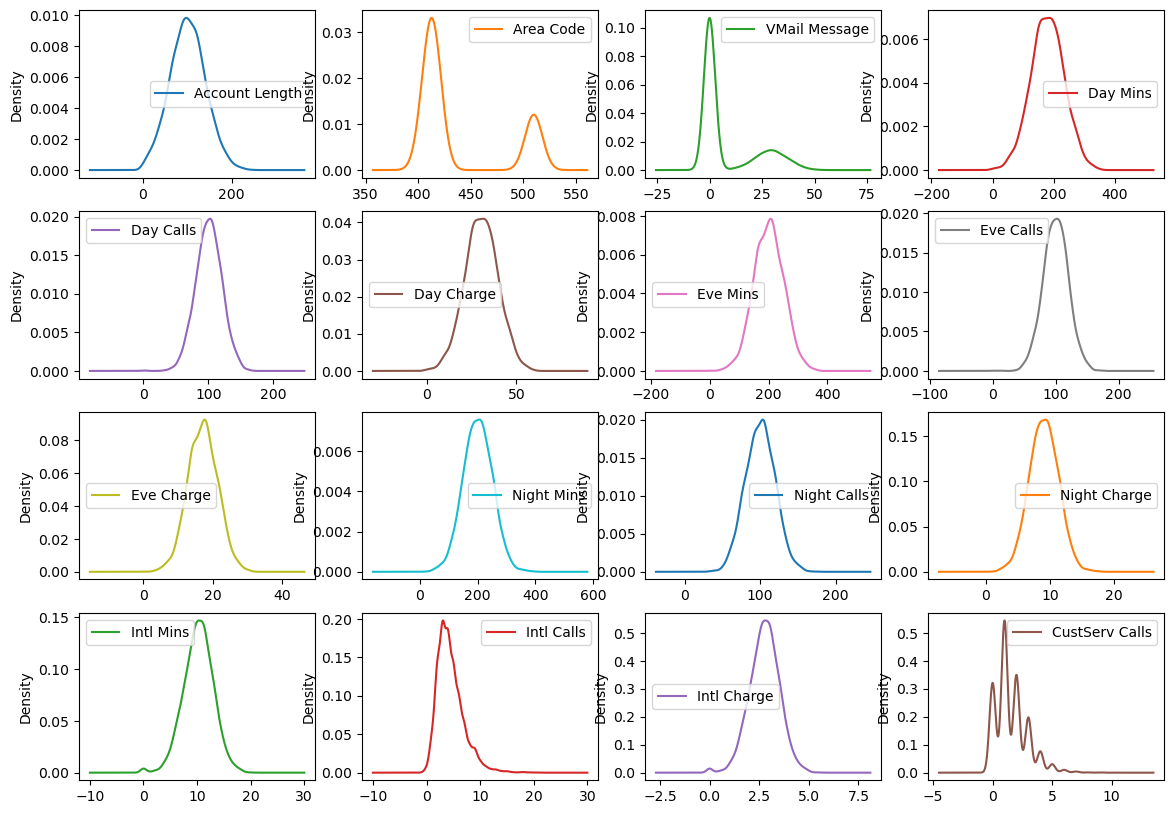

In [42]:
churn.plot(figsize=(14,10), kind='density', subplots=True, layout=(4, 4), sharex=False)

<Axes: xlabel='CustServ Calls', ylabel='Density'>

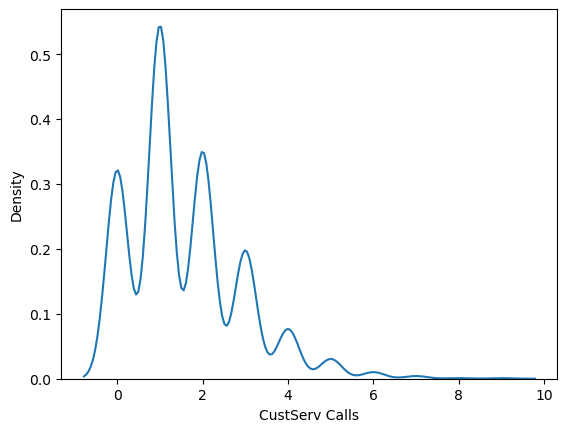

In [43]:
sns.kdeplot(churn["CustServ Calls"])

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(1, 0, 'Account Length'),
  Text(2, 0, 'Area Code'),
  Text(3, 0, 'VMail Message'),
  Text(4, 0, 'Day Mins'),
  Text(5, 0, 'Day Calls'),
  Text(6, 0, 'Day Charge'),
  Text(7, 0, 'Eve Mins'),
  Text(8, 0, 'Eve Calls'),
  Text(9, 0, 'Eve Charge'),
  Text(10, 0, 'Night Mins'),
  Text(11, 0, 'Night Calls'),
  Text(12, 0, 'Night Charge'),
  Text(13, 0, 'Intl Mins'),
  Text(14, 0, 'Intl Calls'),
  Text(15, 0, 'Intl Charge'),
  Text(16, 0, 'CustServ Calls')])

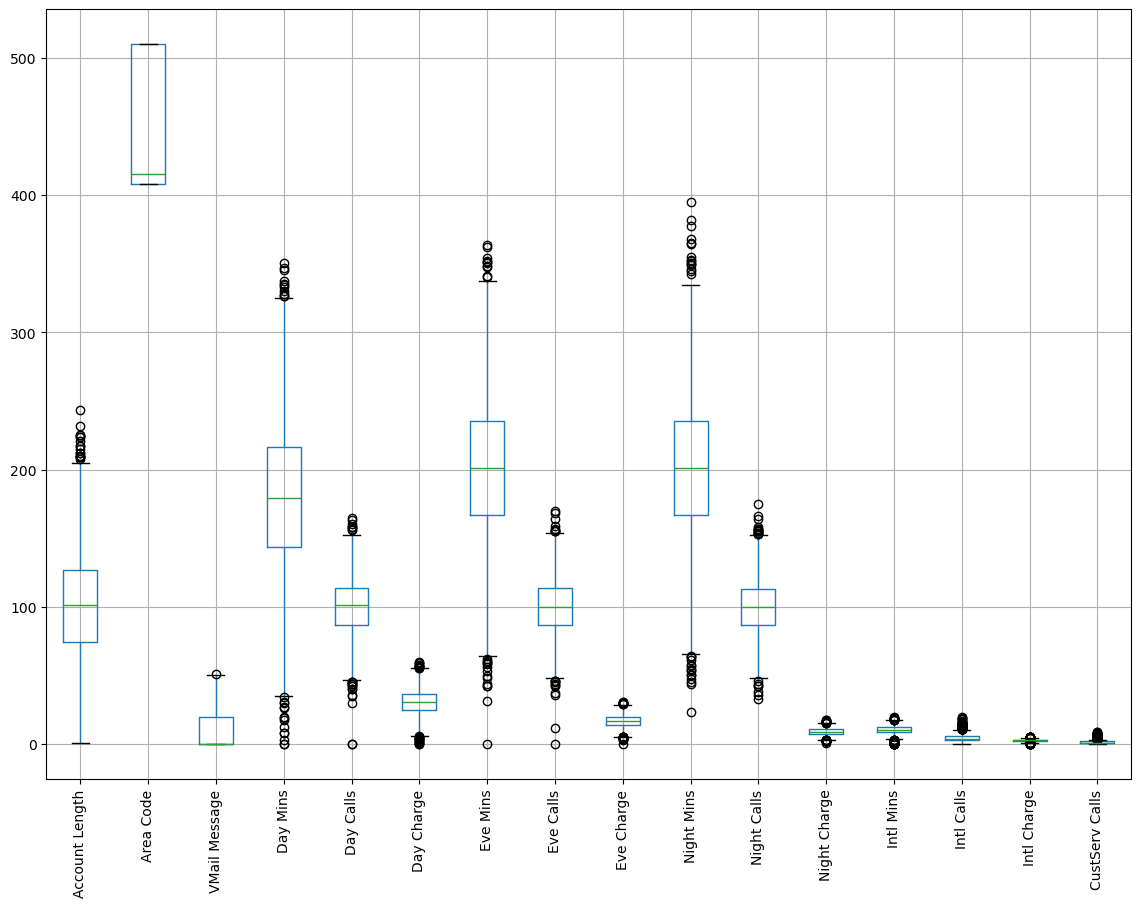

In [44]:
churn.boxplot(figsize=(14,10))
plt.xticks(rotation=90)

Account Length       Axes(0.125,0.712609;0.168478x0.167391)
Area Code         Axes(0.327174,0.712609;0.168478x0.167391)
VMail Message     Axes(0.529348,0.712609;0.168478x0.167391)
Day Mins          Axes(0.731522,0.712609;0.168478x0.167391)
Day Calls            Axes(0.125,0.511739;0.168478x0.167391)
Day Charge        Axes(0.327174,0.511739;0.168478x0.167391)
Eve Mins          Axes(0.529348,0.511739;0.168478x0.167391)
Eve Calls         Axes(0.731522,0.511739;0.168478x0.167391)
Eve Charge            Axes(0.125,0.31087;0.168478x0.167391)
Night Mins         Axes(0.327174,0.31087;0.168478x0.167391)
Night Calls        Axes(0.529348,0.31087;0.168478x0.167391)
Night Charge       Axes(0.731522,0.31087;0.168478x0.167391)
Intl Mins                Axes(0.125,0.11;0.168478x0.167391)
Intl Calls            Axes(0.327174,0.11;0.168478x0.167391)
Intl Charge           Axes(0.529348,0.11;0.168478x0.167391)
CustServ Calls        Axes(0.731522,0.11;0.168478x0.167391)
dtype: object

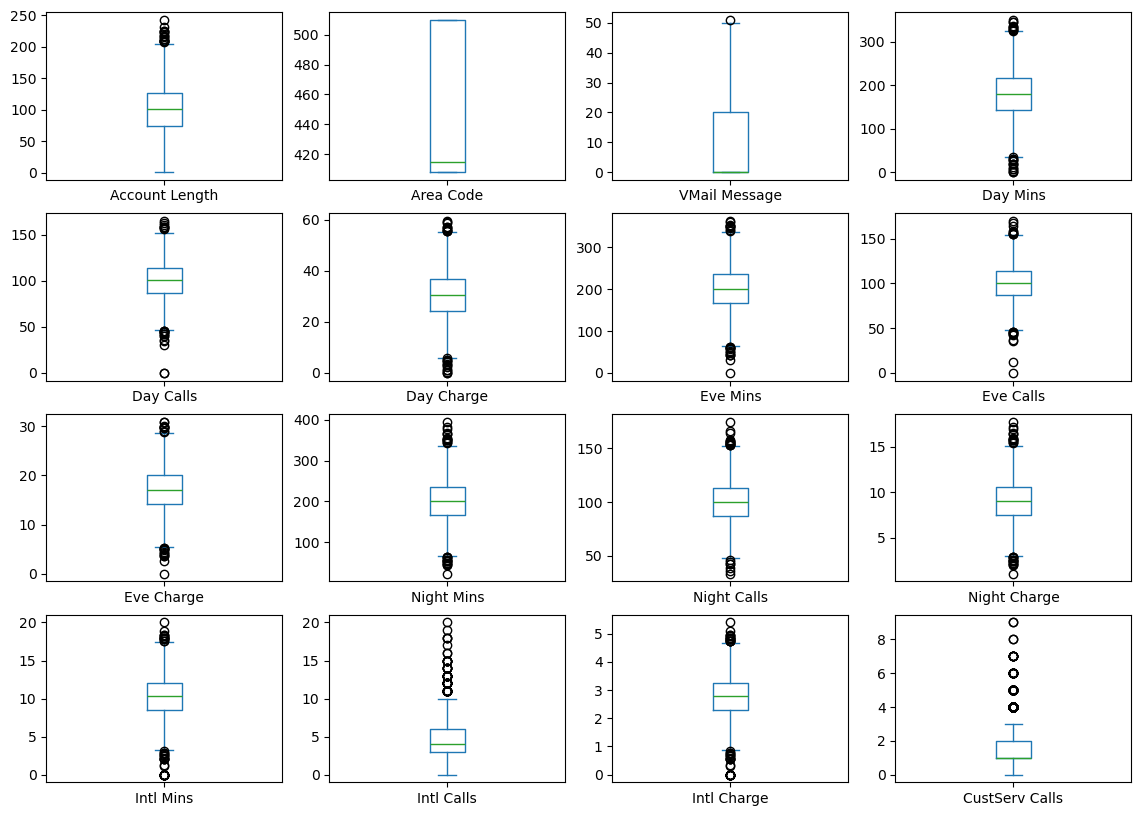

In [45]:
churn.plot(figsize=(14,10), kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False)

<Axes: xlabel='Churn?', ylabel='CustServ Calls'>

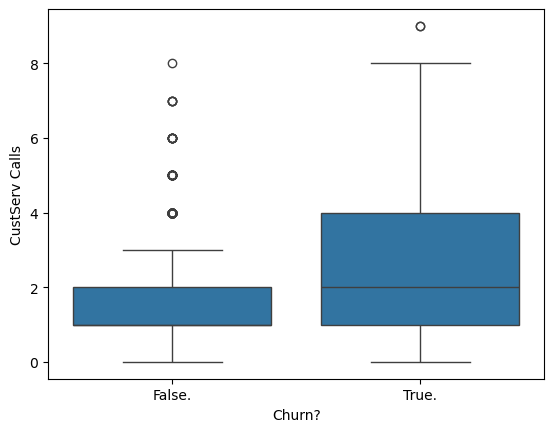

In [46]:
sns.boxplot(x = churn["Churn?"], y = churn["CustServ Calls"], data = churn)

In [47]:
churn_csc_T = churn[churn["Churn?"] == "True."] ["CustServ Calls"]
churn_csc_F = churn[churn["Churn?"] == "False."] ["CustServ Calls"]

([<matplotlib.axis.XTick at 0x7fba164dbb60>,
 [Text(0.45, 0, '0'),
  Text(1.35, 0, '1'),
  Text(2.25, 0, '2'),
  Text(3.1500000000000004, 0, '3'),
  Text(4.05, 0, '4'),
  Text(4.95, 0, '5'),
  Text(5.8500000000000005, 0, '6'),
  Text(6.75, 0, '7'),
  Text(7.65, 0, '8'),
  Text(8.549999999999999, 0, '9')])

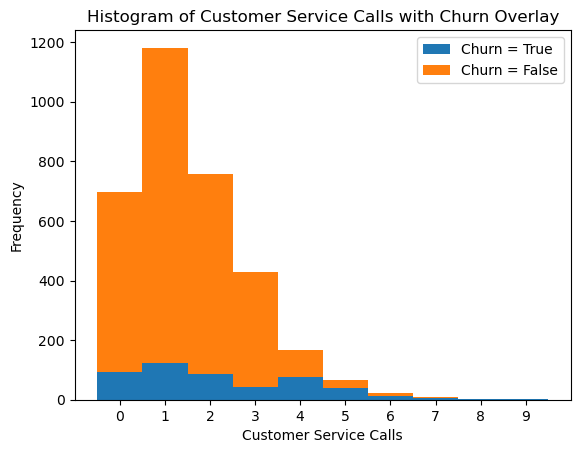

In [48]:
plt.hist([churn_csc_T, churn_csc_F], bins = 10, stacked = True)
plt.legend(['Churn = True', 'Churn = False'])
plt.title('Histogram of Customer Service Calls with Churn Overlay')
plt.xlabel('Customer Service Calls')
plt.ylabel('Frequency')
xlabels = np.arange(10)  # the labels
xpos = [x*0.9+0.45 for x in xlabels]  # the label locations
plt.xticks(xpos, xlabels)

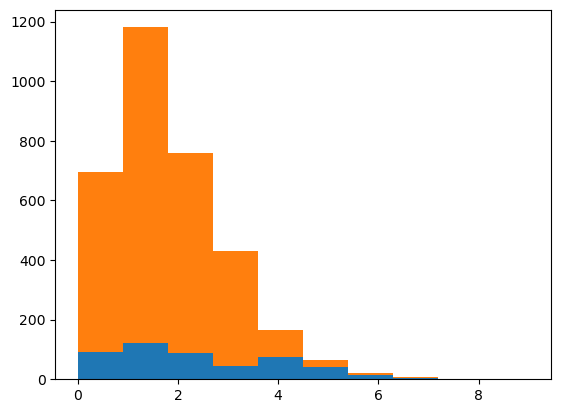

In [49]:
(n, bins, patches) = plt.hist([churn_csc_T, churn_csc_F], bins = 10, stacked = True)

In [50]:
n[1] = n[1] - n[0]
n_table = np.column_stack((n[0], n[1]))
n_norm = n_table / n_table.sum(axis=1)[:, None]
ourbins = np.column_stack((bins[0:10], bins[1:11]))

([<matplotlib.axis.XTick at 0x7fba162c9160>,
 [Text(0.0, 0, '0'),
  Text(0.9000000000000001, 0, '1'),
  Text(1.8, 0, '2'),
  Text(2.7, 0, '3'),
  Text(3.5999999999999996, 0, '4'),
  Text(4.5, 0, '5'),
  Text(5.4, 0, '6'),
  Text(6.3, 0, '7'),
  Text(7.2, 0, '8'),
  Text(8.1, 0, '9')])

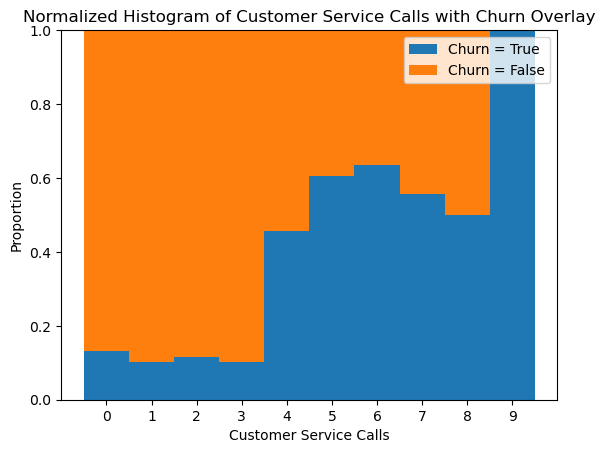

In [51]:
plt.bar(x = ourbins[:,0], height = n_norm[:,0], width = ourbins[:, 1] - ourbins[:, 0])
plt.bar(x = ourbins[:,0], height = n_norm[:,1], width = ourbins[:, 1] - ourbins[:, 0], bottom = n_norm[:,0])
plt.legend(['Churn = True', 'Churn = False'])
plt.title('Normalized Histogram of Customer Service Calls with Churn Overlay')
plt.xlabel('Customer Service Calls')
plt.ylabel('Proportion')
xpos = [x-0.45 for x in xpos]
plt.xticks(xpos, xlabels)

In [60]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"   # Jupyter classic
px.histogram(churn, x="CustServ Calls", color="Churn?", barnorm='fraction')
fig = px.histogram(churn, x="CustServ Calls", color="Churn?", barnorm='fraction')
fig.show()

<Axes: xlabel='Day Mins', ylabel='Eve Mins'>

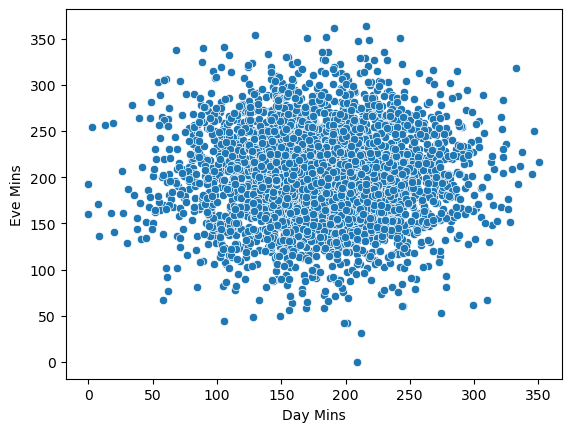

In [57]:
sns.scatterplot(x = "Day Mins", y = "Eve Mins", data = churn)

<Axes: xlabel='Day Mins', ylabel='Eve Mins'>

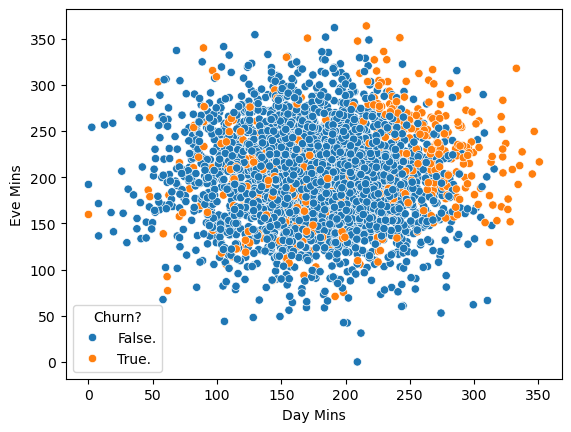

In [61]:
sns.scatterplot(x = "Day Mins", y = "Eve Mins", hue = "Churn?", data = churn)

<Axes: xlabel='Day Mins', ylabel='CustServ Calls'>

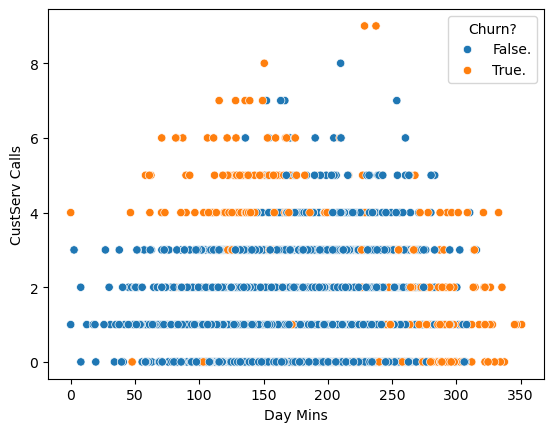

In [62]:
sns.scatterplot(x = "Day Mins", y = "CustServ Calls", hue = "Churn?", data = churn)

In [63]:
churn['Eve Mins binned'] = pd.cut(x = churn['Eve Mins'], bins = [0, 160.01, 240.01, 400], labels=["Low", "Medium", "High"], right = False)

<Axes: title={'center': 'Bar Graph of Evening Minutes (Binned) with Churn Overlay'}, xlabel='Churn?'>

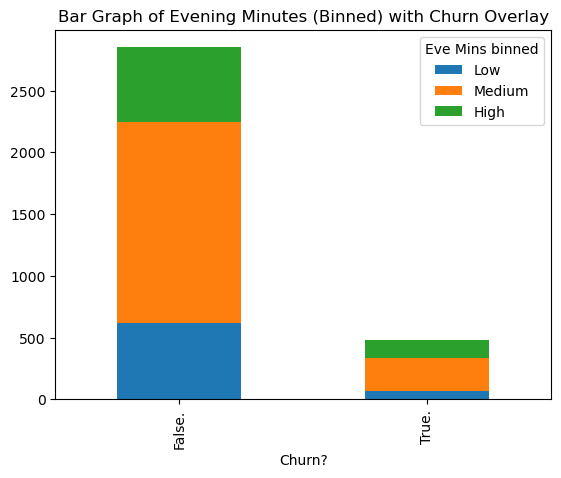

In [64]:
churn_crosstab = pd.crosstab(churn["Churn?"], churn["Eve Mins binned"])
churn_crosstab.plot(kind = 'bar', stacked = True, title = 'Bar Graph of Evening Minutes (Binned) with Churn Overlay')

<Axes: title={'center': 'Bar Graph of Evening Minutes (Binned) with Churn Overlay'}, xlabel='Eve Mins binned'>

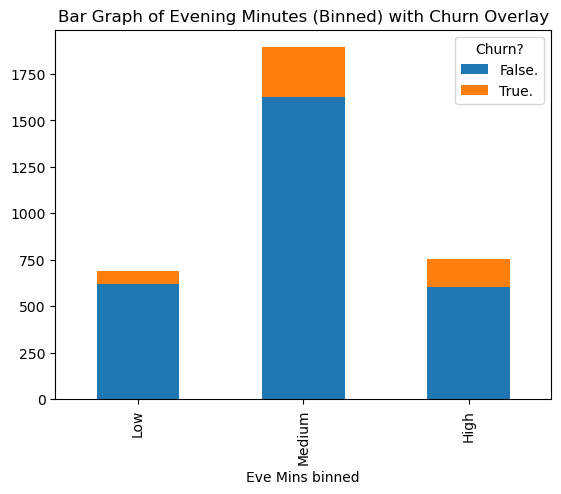

In [65]:
# and pivoted:
churn_crosstab = pd.crosstab(churn["Eve Mins binned"], churn["Churn?"])
churn_crosstab.plot(kind = 'bar', stacked = True, title = 'Bar Graph of Evening Minutes (Binned) with Churn Overlay')

In [66]:
churn_df = churn.drop(columns=['State','Churn?'])

array([[<Axes: xlabel='Account Length', ylabel='Account Length'>,
        <Axes: xlabel='Area Code', ylabel='Account Length'>,
        <Axes: xlabel='VMail Message', ylabel='Account Length'>,
        <Axes: xlabel='Day Mins', ylabel='Account Length'>,
        <Axes: xlabel='Day Calls', ylabel='Account Length'>,
        <Axes: xlabel='Day Charge', ylabel='Account Length'>,
        <Axes: xlabel='Eve Mins', ylabel='Account Length'>,
        <Axes: xlabel='Eve Calls', ylabel='Account Length'>,
        <Axes: xlabel='Eve Charge', ylabel='Account Length'>,
        <Axes: xlabel='Night Mins', ylabel='Account Length'>,
        <Axes: xlabel='Night Calls', ylabel='Account Length'>,
        <Axes: xlabel='Night Charge', ylabel='Account Length'>,
        <Axes: xlabel='Intl Mins', ylabel='Account Length'>,
        <Axes: xlabel='Intl Calls', ylabel='Account Length'>,
        <Axes: xlabel='Intl Charge', ylabel='Account Length'>,
        <Axes: xlabel='CustServ Calls', ylabel='Account Length'>],


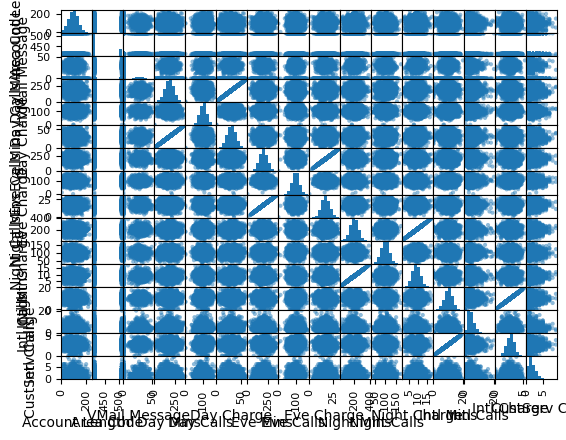

In [67]:
from pandas.plotting import scatter_matrix
scatter_matrix(churn)

In [68]:
# correlation matrix
correlations = churn.corr(numeric_only = True)
correlations

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Account Length,1.000000,-0.012463,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796
Area Code,-0.012463,1.000000,-0.001994,-0.008264,-0.009646,-0.008264,0.003580,-0.011886,0.003607,-0.005825,0.016522,-0.005845,-0.018288,-0.024179,-0.018395,0.027572
VMail Message,-0.004628,-0.001994,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263
Day Mins,0.006216,-0.008264,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423
Day Calls,0.038470,-0.009646,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942
Day Charge,0.006214,-0.008264,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427
Eve Mins,-0.006757,0.003580,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985
Eve Calls,0.019260,-0.011886,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423
Eve Charge,-0.006745,0.003607,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987
Night Mins,-0.008955,-0.005825,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288


[Text(0, 0, 'Account Length'),
 Text(0, 1, 'Area Code'),
 Text(0, 2, 'VMail Message'),
 Text(0, 3, 'Day Mins'),
 Text(0, 4, 'Day Calls'),
 Text(0, 5, 'Day Charge'),
 Text(0, 6, 'Eve Mins'),
 Text(0, 7, 'Eve Calls'),
 Text(0, 8, 'Eve Charge'),
 Text(0, 9, 'Night Mins'),
 Text(0, 10, 'Night Calls'),
 Text(0, 11, 'Night Charge'),
 Text(0, 12, 'Intl Mins'),
 Text(0, 13, 'Intl Calls'),
 Text(0, 14, 'Intl Charge'),
 Text(0, 15, 'CustServ Calls')]

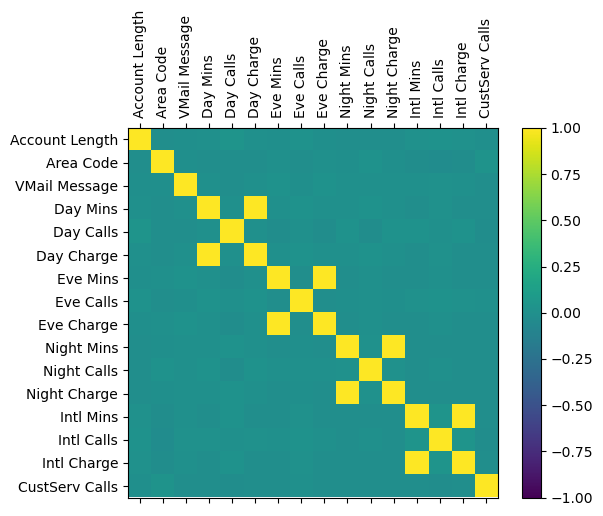

In [69]:
# plot correlation matrix (generic)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
# change the tick labels
ticks = range(0,16,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
numeric_columns = churn.select_dtypes(include='number')
ax.set_xticklabels(numeric_columns.columns, rotation=90)
ax.set_yticklabels(numeric_columns.columns)

In [70]:
churn["Churn?"] = np.where(churn["Churn?"] == "True.", True, False)
mean_day_mins = np.mean(churn["Day Mins"])

print("Mean of Day Mins:", mean_day_mins)

Mean of Day Mins: 179.77509750975094


In [71]:
churn_crosstab = pd.crosstab(churn["Churn?"], churn["Int'l Plan"],margins=False)

In [72]:
pd.crosstab(churn["Churn?"], churn["Int'l Plan"], margins=True)

Int'l Plan,no,yes,All
Churn?,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


<Axes: xlabel="Int'l Plan", ylabel='count'>

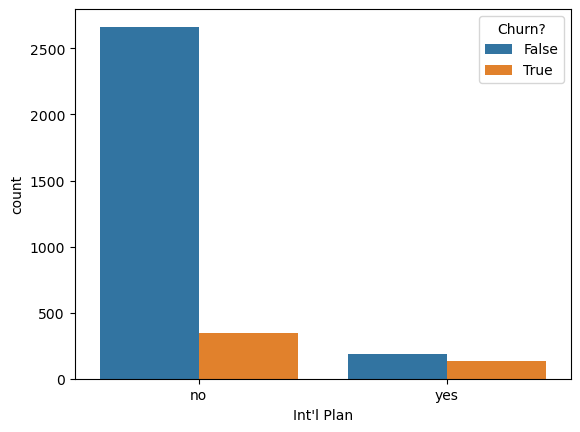

In [73]:
sns.countplot(x="Int'l Plan", hue="Churn?", data=churn)

<Axes: xlabel="Int'l Plan">

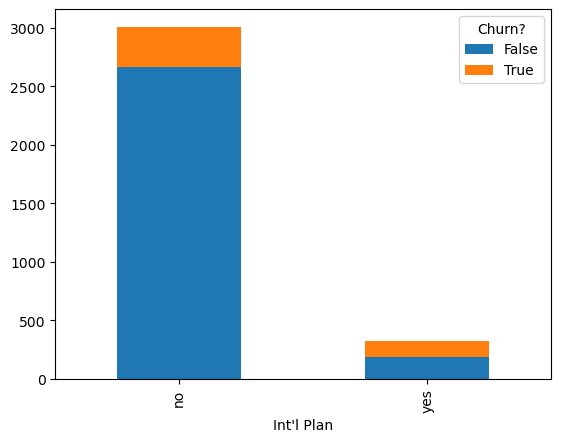

In [74]:
churn_crosstab = churn_crosstab.transpose()
churn_crosstab.plot(kind = 'bar', stacked = True)

In [75]:
churn_crosstab_norm = churn_crosstab.div(churn_crosstab.sum(axis=1), axis=0)
churn_crosstab_norm

Churn?,False,True
Int'l Plan,,
no,0.885050,0.114950
yes,0.575851,0.424149


<Axes: xlabel="Int'l Plan">

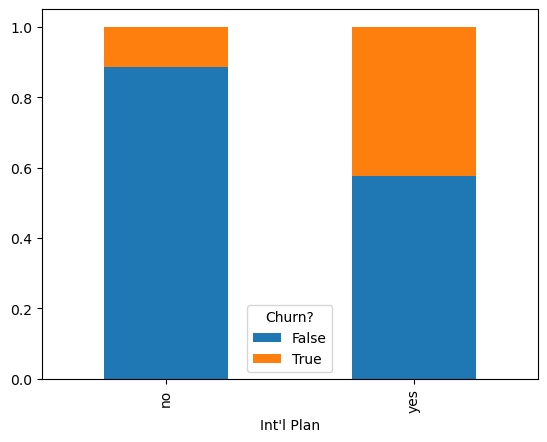

In [76]:
churn_crosstab_norm.plot(kind = 'bar', stacked = True)